<a href="https://colab.research.google.com/github/PedroMatumoto/AI_Notebooks/blob/main/analise_seguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Seleção de Dados em Pandas

Referências e Materiais úteis para este Lab:

- [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/Pandas_I.ipynb)

- [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

---



## **CASE Insurance**

Acesse a base de dados [`insurance`](https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/insurance.csv) para as questões a seguir.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##### Q1. Acesse os dados explore a estrutura básica dos dados de `insurance`.

> * Qual o número de caso de seguro?
> * Quantos atributos são numéricos?
> * Há quantos valores diferentes para região?
> * Qual a maior quantidade de filhos?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
print(f'Número de casos de seguro: {len(df)}')
print(f'Número de atributos numéricos: {len(df.select_dtypes(include="number").columns)}')
print(f'Número de valores diferentes para região: {len(df["region"].unique())}')
print(f'Maior quantidade de filhos: {df["children"].max()}')
print(df["region"].unique())

Número de casos de seguro: 1338
Número de atributos numéricos: 4
Número de valores diferentes para região: 4
Maior quantidade de filhos: 5
['southwest' 'southeast' 'northwest' 'northeast']


##### Q2. Qual a quantidade de casos por região?

In [15]:
print(df["region"].value_counts())
df.isnull().sum()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


##### Q3. Qual a média dos pagamentos (charges) efetuados?

In [17]:
print(f"Média de pagamentos {df['charges'].mean()}")

Média de pagamentos 13270.422265141257


##### Q4. Qual a média dos pagamentos (charges) dos 10 maiores pagamentos efetuados?

In [18]:
print(f"Média dos 10 maiores pagamentos {df.nlargest(10, 'charges')['charges'].mean()}")

Média dos 10 maiores pagamentos 55130.961078


##### Q5. Calcule a distância interquartis dos pagamentos.

**Dica** Empregue a função `quantile()` do `Pandas` e use IQR = Q3 - Q1.



In [19]:
print(f"Distância interquartis: {df['charges'].quantile(0.75) - df['charges'].quantile(0.25)}")

Distância interquartis: 11899.625365


##### Q6. Empregue o valor IQR da questão anterior para verificar se existem *outliers* dos pagamentos.

**Dica** *outliers* são dados fora do intervalo $[Q1 - 1.5 IQR, Q3 + 1.5 IQR]$

Outliers: 


<Axes: xlabel='charges'>

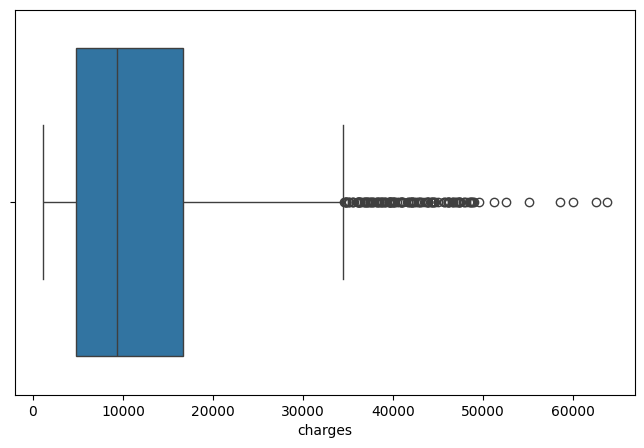

In [27]:
print("Outliers: ")
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['charges'])


##### Q7. Qual a média dos pagamentos efetuados para os 10 casos com menor idade dos segurados? Aqui, empregue a função `nsmallest()`.

In [20]:
print(f"Média dos 10 maiores pagamentos {df.nsmallest(10, 'age')['charges'].mean()}")

Média dos 10 maiores pagamentos 11968.65424


##### Q8. Revise a questão anterior. De fato calculamos a média de *todos* os seguros de indivíduos com idade entre as 10 menores idades?

**Dica** Verifique quantos indivíduos há com a menor idade

In [30]:
print(f"Quantidade de indivíduos com a menor idade: {len(df[df['age'] == df['age'].min()])}")
print(f"Média dos 10 maiores pagamentos {df[df['age'] == df['age'].min()]['charges'].mean()}")

Quantidade de indivíduos com a menor idade: 69
Média dos 10 maiores pagamentos 7086.217556362319
